In [1]:
import os
import shutil

import glob
import numpy as np

import tarfile

In [4]:
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.autograd import Variable

def test_network(net, trainloader):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr = 0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # create Variable for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then idpate weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True

def imshow(image, ax = None, title = None, normalize = True):
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1,2,0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.thick_params(axis = 'both', length = 0)
    
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax



In [7]:
TARGET_PATH = "./data/Images"

len(os.listdir(TARGET_PATH)) # 강아지 종류

120

In [8]:
# 파일 이름 변경
for dir_name in os.listdir(TARGET_PATH):
    breed_name = dir_name.split('-')[-1].lower()

    source_dir = os.path.join(TARGET_PATH, dir_name)
    target_dir = os.path.join(TARGET_PATH, breed_name)
    
    shutil.move(source_dir, target_dir) # source_dir파일을 target_dir로 이름 변경

In [11]:
dataset = []

for filepath in glob.iglob(f'{TARGET_PATH}/**/*.jpg', recursive=True): # TARGET_PATH 기준 모든 하위 디렉토리에서 해당 확장자 파일을 검출하고 싶을 때
    breed_name = filepath.split('/')[3]
    dataset.append([filepath, breed_name])
dataset = np.array(dataset)

In [12]:
dataset

array([['./data/Images/collie/n02106030_16370.jpg', 'collie'],
       ['./data/Images/collie/n02106030_14089.jpg', 'collie'],
       ['./data/Images/collie/n02106030_16162.jpg', 'collie'],
       ...,
       ['./data/Images/french_bulldog/n02108915_5667.jpg',
        'french_bulldog'],
       ['./data/Images/french_bulldog/n02108915_3527.jpg',
        'french_bulldog'],
       ['./data/Images/french_bulldog/n02108915_4066.jpg',
        'french_bulldog']], dtype='<U82')

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# stratify : 지정한 Data의 비율을 유지, 
# label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할
train_image, test_image, train_target, test_target = train_test_split(dataset[:,0], dataset[:,1], stratify=dataset[:,1])

In [16]:
train_image.shape, test_image.shape

((15435,), (5145,))

In [17]:
import pandas as pd

In [21]:
pd.Series(train_target).value_counts() #/ len(train_target)

coated_retriever        227
maltese_dog             189
afghan_hound            179
scottish_deerhound      174
pomeranian              164
                       ... 
pekinese                112
bouvier_des_flandres    112
golden_retriever        112
doberman                112
redbone                 111
Length: 119, dtype: int64

In [22]:
pd.Series(test_target).value_counts() / len(test_target)

coated_retriever      0.014772
maltese_dog           0.012245
afghan_hound          0.011662
scottish_deerhound    0.011273
samoyed               0.010690
                        ...   
pekinese              0.007191
kuvasz                0.007191
affenpinscher         0.007191
redbone               0.007191
clumber               0.007191
Length: 119, dtype: float64

In [24]:
set(test_target)

{'affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'coated_retriever',
 'coated_wheaten_terrier',
 'cocker_spaniel',
 'collie',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'french_bulldog',
 'german_shepherd',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',
 'haired_fox_terrier',
 'haired_pointer',
 'ibizan_hound',
 'iris

train과 test 폴더를 나눠서 진행

In [25]:
DATA_PATH = './data/dataset'

if not os.path.exists(DATA_PATH):
    os.mkdir(DATA_PATH) # 단일 폴더만 생성 가능
    os.makedirs(os.path.join(DATA_PATH, 'train')) # 폴더를 여러개 만들기 가능
    os.mkdir(os.path.join(DATA_PATH, 'test'))

    for breed_name in set(test_target):
        os.makedirs(os.path.join(DATA_PATH, 'train', breed_name))
        os.mkdir(os.path.join(DATA_PATH, 'test', breed_name))

In [33]:
# 
for filepath, target_dir in zip(train_image.tolist(), train_target.tolist()):
    filename = filepath.split('/')[-1]
    source_path = filepath
    target_dir = os.path.join(DATA_PATH, 'train', target_dir, filename)
    print(source_path, '--------------',target_dir)
    shutil.copy(source_path, target_dir) # shutil.copy(복사할 파일, 복사위치+파일명)


./data/Images/border_collie/n02106166_3865.jpg -------------- ./data/dataset/train/border_collie/n02106166_3865.jpg
./data/Images/tibetan_mastiff/n02108551_2658.jpg -------------- ./data/dataset/train/tibetan_mastiff/n02108551_2658.jpg
./data/Images/silky_terrier/n02097658_8018.jpg -------------- ./data/dataset/train/silky_terrier/n02097658_8018.jpg
./data/Images/giant_schnauzer/n02097130_1119.jpg -------------- ./data/dataset/train/giant_schnauzer/n02097130_1119.jpg
./data/Images/irish_water_spaniel/n02102973_4510.jpg -------------- ./data/dataset/train/irish_water_spaniel/n02102973_4510.jpg
./data/Images/norwich_terrier/n02094258_2032.jpg -------------- ./data/dataset/train/norwich_terrier/n02094258_2032.jpg
./data/Images/irish_water_spaniel/n02102973_2209.jpg -------------- ./data/dataset/train/irish_water_spaniel/n02102973_2209.jpg
./data/Images/coated_wheaten_terrier/n02098105_1067.jpg -------------- ./data/dataset/train/coated_wheaten_terrier/n02098105_1067.jpg
./data/Images/groe

In [34]:
for filepath, target_dir in zip(test_image.tolist(), test_target.tolist()):
    filename = filepath.split('/')[-1]
    source_path = filepath
    target_dir = os.path.join(DATA_PATH, 'test', target_dir, filename)
    print(source_path, target_dir)
    shutil.copy(source_path, target_dir)


./data/Images/cardigan/n02113186_694.jpg ./data/dataset/test/cardigan/n02113186_694.jpg
./data/Images/entlebucher/n02108000_1462.jpg ./data/dataset/test/entlebucher/n02108000_1462.jpg
./data/Images/blenheim_spaniel/n02086646_2772.jpg ./data/dataset/test/blenheim_spaniel/n02086646_2772.jpg
./data/Images/kuvasz/n02104029_1612.jpg ./data/dataset/test/kuvasz/n02104029_1612.jpg
./data/Images/norfolk_terrier/n02094114_566.jpg ./data/dataset/test/norfolk_terrier/n02094114_566.jpg
./data/Images/great_pyrenees/n02111500_6338.jpg ./data/dataset/test/great_pyrenees/n02111500_6338.jpg
./data/Images/tzu/n02086240_2705.jpg ./data/dataset/test/tzu/n02086240_2705.jpg
./data/Images/japanese_spaniel/n02085782_1724.jpg ./data/dataset/test/japanese_spaniel/n02085782_1724.jpg
./data/Images/leonberg/n02111129_4477.jpg ./data/dataset/test/leonberg/n02111129_4477.jpg
./data/Images/tzu/n02086240_7349.jpg ./data/dataset/test/tzu/n02086240_7349.jpg
./data/Images/bluetick/n02088632_1636.jpg ./data/dataset/test/bl

In [35]:
target_dir

'./data/dataset/test/shetland_sheepdog/n02105855_5012.jpg'

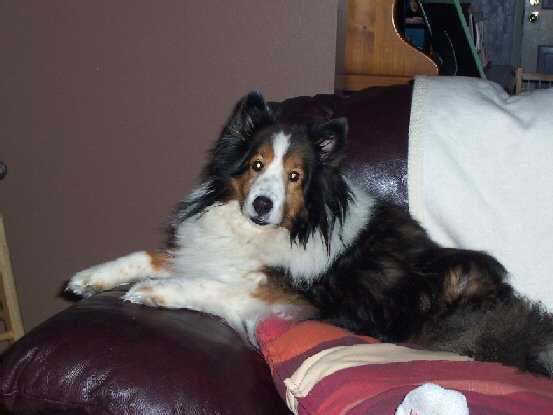

In [36]:
from PIL import Image # 이미지 다루기

im = Image.open(target_dir)
im